In [1]:
import numpy as np
import openfst_python as fst
import matplotlib.pyplot as plot
import re
%matplotlib inline

In [2]:
def CompileFstStringFile(file_name):
    compiler = fst.Compiler()

    f = open(file_name, 'r')
    lines = f.readlines()
    for line in lines:
        compiler.write(line)
    f.close()

    return compiler.compile()

In [3]:
def ReadFstStringFile(file_name):
    I = ('0', 0)
    E = []
    F = []
    f = open(file_name, 'r')
    lines = f.readlines()
    for line in lines:
        line = re.sub("\s\s+" , " ", line.strip('\n')).split(" ")
        if len(line) < 5:
            F += [(line[0], float(line[1]))]
            continue
        E += [((line[0]), line[2], line[3], float(line[4]), (line[1]))]
    f.close()
    
    return (I, E, F)

In [4]:
def WriteFstStringFile(fst, file_name):
    N = []
    for x in fst[1]:
        if x[0] not in N:
            N.append(x[0])
        if x[4] not in N:
            N.append(x[4])
    f = open(file_name, 'w')
    for x in fst[1]:
        f.write('%d %d %s %s %f\n'%(N.index(x[0]), N.index(x[4]), x[1], x[2], x[3]))
    for x in fst[2]:
        f.write('%s %f\n'%(N.index(x[0]), x[1]))
    f.close()

In [5]:
def Compose(T1, T2):
    I = []
    E = []
    F = []
    Q = []
    S = []
    I1xI2 = ([(T1[0][0], T2[0][0])], [T1[0][1]+T2[0][1]])
    F1xF2 = ([(x1[0], x2[0]) for x1 in T1[2] for x2 in T2[2]], [x1[1]+x2[1] for x1 in T1[2] for x2 in T2[2]])
    Q.insert(0, I1xI2[0][0])
    S.insert(0, I1xI2[0][0])
    while len(S) > 0:
        q1, q2 = S.pop()
        if (q1, q2) in I1xI2[0]:
            I.append(((q1, q2), I1xI2[1][I1xI2[0].index((q1, q2))]))
        if (q1, q2) in F1xF2[0]:
            F.append(((q1, q2), F1xF2[1][F1xF2[0].index((q1, q2))]))
        Eq1 = [x for x in T1[1] if x[0]==q1]
        Eq2 = [x for x in T2[1] if x[0]==q2]
        for e1 in Eq1:
            for e2 in Eq2:
                if e1[2] == e2[1]:
                    if (e1[4], e2[4]) not in Q:
                        Q.append((e1[4], e2[4]))
                        S.insert(0, (e1[4], e2[4]))
                    E.append(((q1, q2), e1[1], e2[2], e1[3]+e2[3], (e1[4], e2[4])))
    return (I, E, F)

In [6]:
a = ReadFstStringFile('A.fst')
a

(('0', 0),
 [('0', '1', '2', 0.1, '1'),
  ('0', '2', '1', 0.2, '2'),
  ('1', '1', '1', 0.4, '3'),
  ('1', '3', '1', 0.3, '1'),
  ('2', '2', '2', 0.5, '3')],
 [('3', 0.6)])

In [7]:
b = ReadFstStringFile('B.fst')
b

(('0', 0),
 [('0', '2', '3', 0.3, '1'),
  ('1', '1', '2', 0.4, '2'),
  ('2', '1', '2', 0.6, '2')],
 [('2', 0.7)])

In [8]:
c = Compose(a, b)
c

([(('0', '0'), 0)],
 [(('0', '0'), '1', '3', 0.4, ('1', '1')),
  (('1', '1'), '1', '2', 0.8, ('3', '2')),
  (('1', '1'), '3', '2', 0.7, ('1', '2')),
  (('1', '2'), '1', '2', 1.0, ('3', '2')),
  (('1', '2'), '3', '2', 0.8999999999999999, ('1', '2'))],
 [(('3', '2'), 1.2999999999999998)])

In [9]:
WriteFstStringFile(c, 'C.fst')

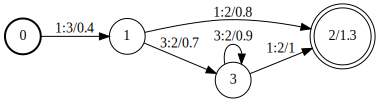

In [10]:
c = CompileFstStringFile('C.fst')
c